# Exercise 2 Solution

Given noisy data from the following function:

f(x) = sin(x) + cos(2x)

Implement a regression model in form of a feed forward neural network to approximate the function.

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.optim import Adam


# random numbers generated deterministically for reproducability
np.random.seed(0)
torch.random.manual_seed(0)

### a)

Generate a data set D with N = 50 data points utilizing the given function. Note that the data set
should not be optimal due to the guassian noise ν. Consider reasonable range for x and ν.

In [ ]:
y = lambda x: np.sin(x) + np.cos(2*x)

N = 50
x_data = np.linspace(0, 2*np.pi, N)
y_data = y(x_data) + np.random.normal(0, 0.1, N)

### b)

 Plot the function y(x) and the generated data samples.

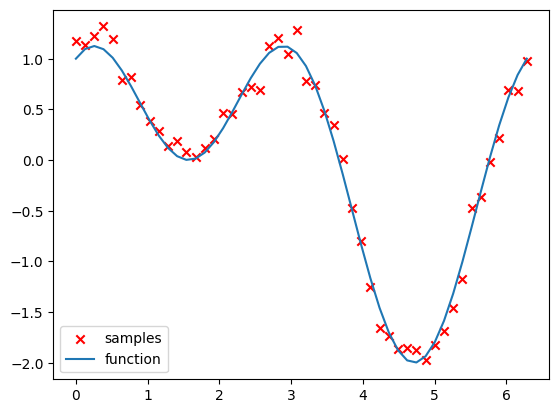

In [ ]:
plt.figure()

plt.scatter(x_data, y_data, color='red', marker='x', label='samples')
plt.plot(x_data, y(x_data), label='function')

plt.legend()
plt.show()

### c)

Use a simple learner, e.g., a feed-forward neural network with one hidden layer to learn the model. Try different hidden neurons size (1, 10, 100).

In [ ]:
epochs = 10000
learning_rate = 0.01
n_hidden = 10

In [ ]:
def Net(hidden_number):
  return nn.Sequential(
      nn.Linear(1, hidden_number),
      nn.Tanh(),
      nn.Linear(hidden_number, 1)
  )

In [ ]:
class Net(nn.Module):
  def __init__(self, hidden_number):
    super().__init__()
    self.Linear1 = nn.Linear(1, hidden_number)
    self.Out = nn.Linear(hidden_number, 1)

  def forward(self, x):
    x = self.Linear1(x)
    x = torch.tanh(x)
    x = self.Out(x)
    return x

In [ ]:
model = Net(n_hidden)
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

print(model)

Net(
  (Linear1): Linear(in_features=1, out_features=10, bias=True)
  (Out): Linear(in_features=10, out_features=1, bias=True)
)


Train the network with the dataset D

In [ ]:
# convert data to pytorch tensors

x_tensor = torch.from_numpy(x_data[:, None]).float()
y_tensor = torch.from_numpy(y_data[:, None]).float()

# train model
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = loss_fn(y_pred, y_tensor)

    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f'Epoch {epoch}: MSELoss = {loss.item()}')

Epoch 0: MSELoss = 1.1132328510284424
Epoch 1000: MSELoss = 0.01192221324890852
Epoch 2000: MSELoss = 0.010742566548287868
Epoch 3000: MSELoss = 0.010413158684968948
Epoch 4000: MSELoss = 0.010054398328065872
Epoch 5000: MSELoss = 0.009438588283956051
Epoch 6000: MSELoss = 0.009284434840083122
Epoch 7000: MSELoss = 0.008992553688585758
Epoch 8000: MSELoss = 0.008865038864314556
Epoch 9000: MSELoss = 0.008788686245679855


### d)

Test the trained network on 20 different data points drawn from the optimal function 1. Which
network size gives the best solution?

In [ ]:
N_test = 20
x_test = np.linspace(0, 2*np.pi, N_test)
y_test = y(x_test)

x_test_tensor = torch.from_numpy(x_test[:, None]).float()
y_test_tensor = torch.from_numpy(y_test[:, None]).float()

with torch.no_grad():
  y_pred = model(x_test_tensor)
  loss = loss_fn(y_pred, y_test_tensor)

print(f'MSELoss on test data : {loss.item()}')

MSELoss on test data : 0.0037624097894877195


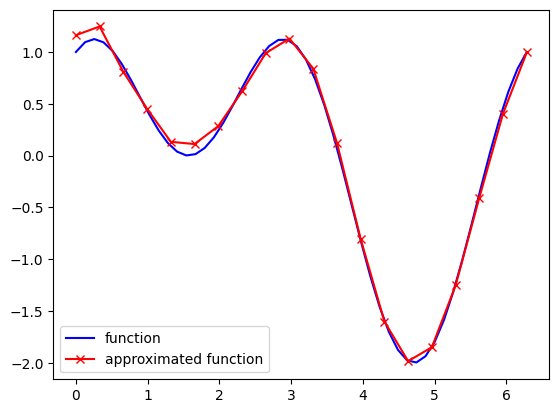

In [ ]:
plt.figure()

# plt.scatter(x_data, y_data, color='red', marker='x', label='samples')
plt.plot(x_data, y(x_data), color='blue', label='function')
plt.plot(x_test, y_pred.numpy(), marker='x', color='red', label='approximated function')

plt.legend()
plt.show()